In [11]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

In [2]:
url="https://www.google.com/search?q=world+cricket+2023&oq=world+cricket+2023&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQLhiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCTEzOTQ0ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8#sie=lg;/m/0w61w3s;5;/m/021vk;mt;fp;1;;;"

In [12]:
driver=webdriver.Chrome()
driver.get(url)

In [13]:
soup=BeautifulSoup(driver.page_source,"html.parser")

<bound method Tag.prettify of <html class="TaoyYc" itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-PK" style="top: 0px;"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>world cricket 2023 - Google Search</title><script async="" id="www-widgetapi-script" nonce="" src="https://www.youtube.com/s/player/43bc9526/www-widgetapi.vflset/www-widgetapi.js" type="text/javascript"></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'MnnEZq78NpuJ7NYPn-axWQ',kEXPI:'31',kBL:'dNEy',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-PK';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI
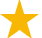
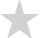
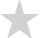
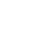
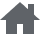
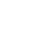
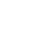
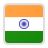
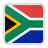
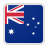
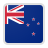
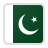
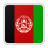
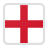
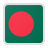
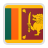
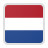
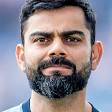
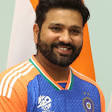
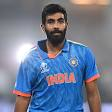
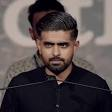
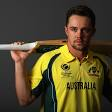
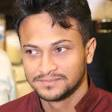
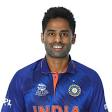
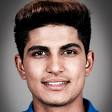
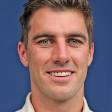
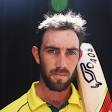
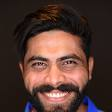
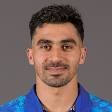
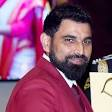
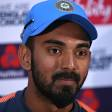
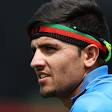
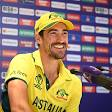
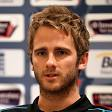
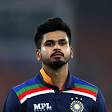
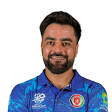
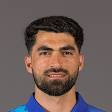
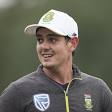
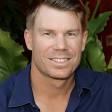
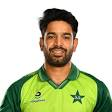
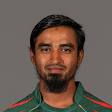
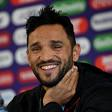
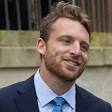
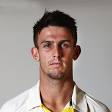
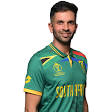
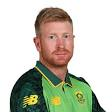
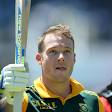
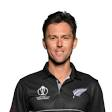
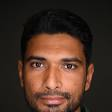
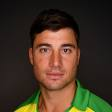
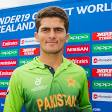
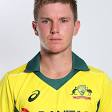
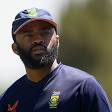
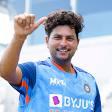
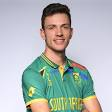
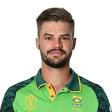
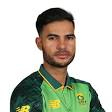
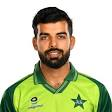
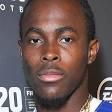
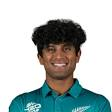
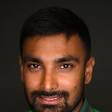
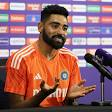
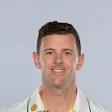
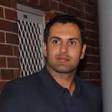
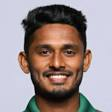
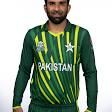
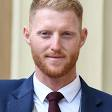
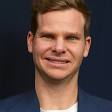
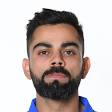
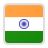
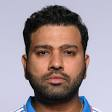
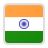
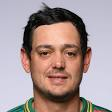
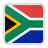
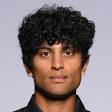
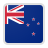
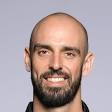
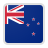
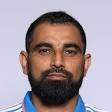
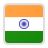
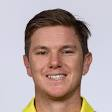
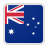
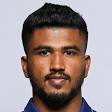
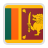
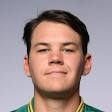
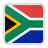
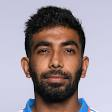
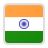
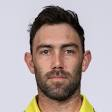
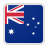
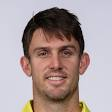
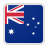
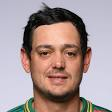
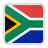
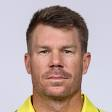
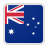
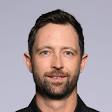
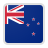
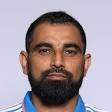
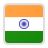
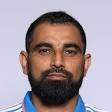
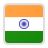
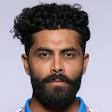
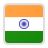
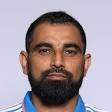
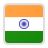
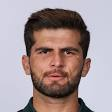
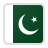
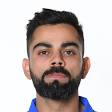
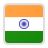
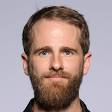
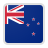
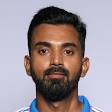
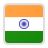
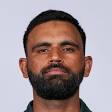
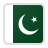
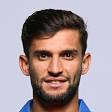
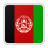
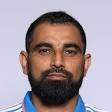
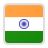
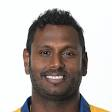
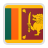
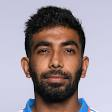
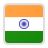
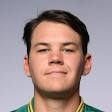
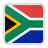
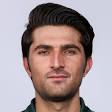
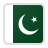
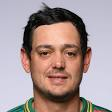
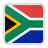
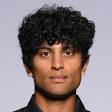
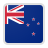
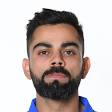
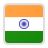
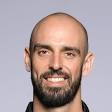
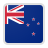
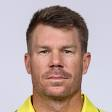
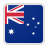
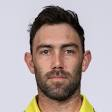
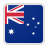
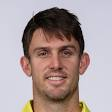
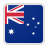
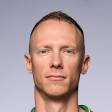
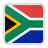
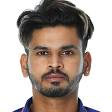
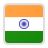
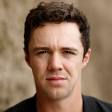
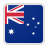
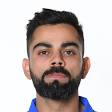
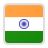
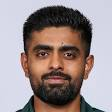
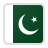
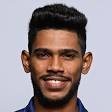
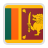
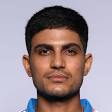
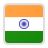
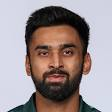
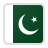
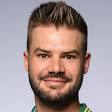
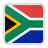
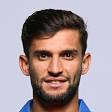
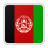
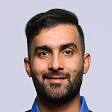
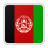
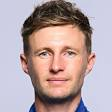
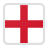
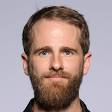
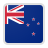
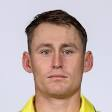
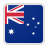
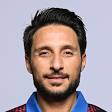
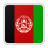
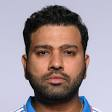
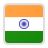
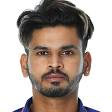
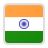
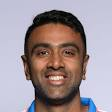
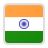
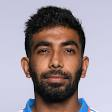
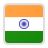
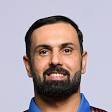
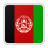
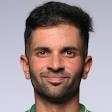
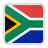
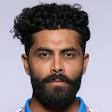
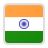
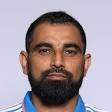
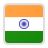
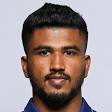
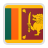
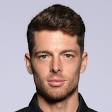
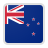
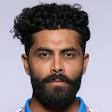
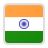
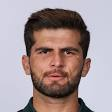
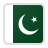
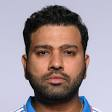
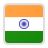
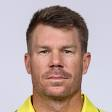
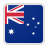
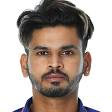
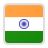
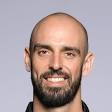
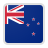
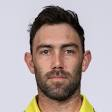
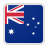
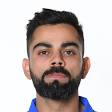
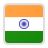
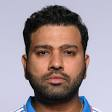
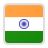
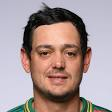
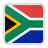
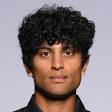
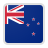
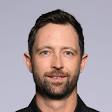
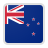
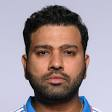
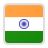
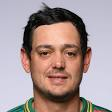
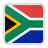
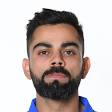
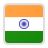
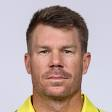
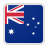
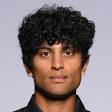
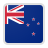
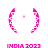
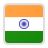
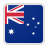
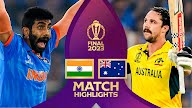
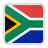
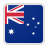
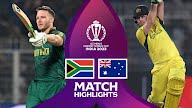
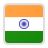
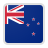
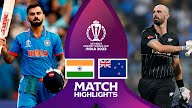
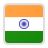
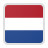
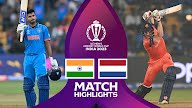
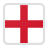
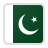
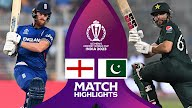
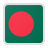
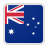
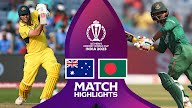
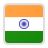
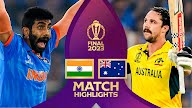
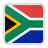
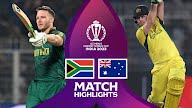
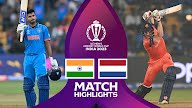
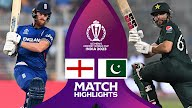
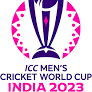
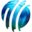
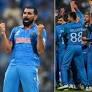
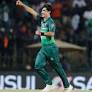
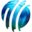
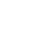
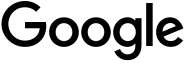
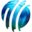
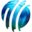

In [14]:
print(soup.prettify)

In [15]:
box=soup.find("table",{"class":"KAIX8d"}).text.strip()

In [16]:
print(box)

ODI 1 of 485 Oct 23EnglandEngland282/9 (50)New ZealandNew Zealand283/1 (36.2)NZ won by 9 wickets (82 balls left)Match highlights, duration 5 minutes and 7 seconds► 5:07


In [34]:
Team=[]
for team in soup.find_all("div",{"class":"liveresults-sports-immersive__hide-element"}):
    tea=team.get_text(strip=True)
    Team.append(tea)

In [36]:
len(Team)

108

In [37]:
Team1=Team[1::2]

In [39]:
Team2=Team[::2]

In [42]:
Score=[]
for sc in soup.find_all("div",{"class":"imspo_mt__t-sc"}):
    score=sc.get_text(strip=True)
    Score.append(score)

In [44]:
Team1_score=Score[1::2]

In [45]:
Team2_score=Score[::2]

In [52]:
Winner=[]
for win in soup.find_all("div",{"class":"imspo_mt__game-status imspo_mt__status-padding-wide"}):
    winer=win.get_text(strip=True)
    Winner.append(winer)

In [54]:
len(Winner)

46

In [55]:
winners=Winner + [0] * (len(Team1) - len(Winner))

In [56]:
import pandas as pd

In [61]:
data={"Team1":Team2,"Team2":Team1,"Team1_Score":Team2_score,"Team2_Score":Team1_score,"Winner":winners}

In [62]:
df=pd.DataFrame(data=data)

In [65]:
df.head()

,Team1,Team2,Team1_Score,Team2_Score,Winner
0,England,New Zealand,282/9 (50),283/1 (36.2),NZ won by 9 wickets (82 balls left)
1,Pakistan,Netherlands,286 (49),205 (41),PAK won by 81 runs
2,Afghanistan,Bangladesh,156 (37.2),158/4 (34.4),BAN won by 6 wickets (92 balls left)
3,South Africa,Sri Lanka,428/5 (50),326 (44.5),SA won by 102 runs
4,Australia,India,199 (49.3),201/4 (41.2),IND won by 6 wickets (52 balls left)


In [66]:
df.to_csv("Wc2023.csv")